In [281]:
import pandas as pd

In [282]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [283]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [284]:
excel=pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

In [285]:
new=pd.read_excel(excel,'NewCustomerList',header=1)

In [286]:
transaction=pd.read_excel(excel,'Transactions',header=1)

In [287]:
new_customer_lst=pd.read_excel(excel,'NewCustomerList',header=1)

In [288]:
demographics=pd.read_excel(excel,'CustomerDemographic',header=1)

In [289]:
cust_address=pd.read_excel(excel,'CustomerAddress',header=1)

# --------------------------------------------------------------------------------------------------------

In [290]:
transaction.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [291]:
transaction=transaction[['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date']].copy(deep=True)

In [292]:
transaction.shape,

((20000, 13),)

In [293]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [294]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [295]:
transaction.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [296]:
transaction[transaction['product_class'].isna()==True][['online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size']]

,online_order,order_status,brand,product_line,product_class,product_size
136,0.0,Approved,NaN,NaN,NaN,NaN
159,0.0,Approved,NaN,NaN,NaN,NaN
366,0.0,Approved,NaN,NaN,NaN,NaN
406,1.0,Approved,NaN,NaN,NaN,NaN
676,0.0,Approved,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
19340,1.0,Approved,NaN,NaN,NaN,NaN
19383,0.0,Approved,NaN,NaN,NaN,NaN
19793,0.0,Approved,NaN,NaN,NaN,NaN
19859,1.0,Approved,NaN,NaN,NaN,NaN


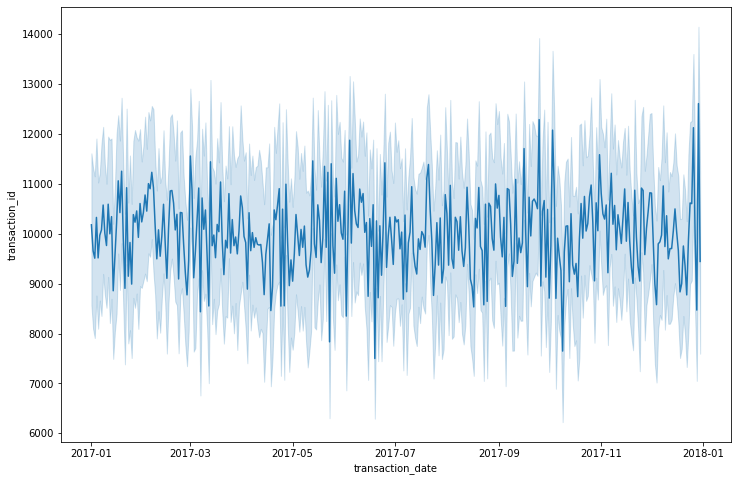

In [297]:
plt.rcParams['figure.figsize']=[12,8]
sns.lineplot(transaction['transaction_date'],transaction['transaction_id'])

In [298]:
#so there are no anomalies in dates

In [299]:
for i in transaction[['online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size']]:
    print('\n\n',i)
    print(transaction[i].value_counts()/20000*100)



 online_order
1.0    49.145
0.0    49.055
Name: online_order, dtype: float64


 order_status
Approved     99.105
Cancelled     0.895
Name: order_status, dtype: float64


 brand
Solex             21.265
Giant Bicycles    16.560
WeareA2B          16.475
OHM Cycles        15.215
Trek Bicycles     14.950
Norco Bicycles    14.550
Name: brand, dtype: float64


 product_line
Standard    70.880
Road        19.850
Touring      6.170
Mountain     2.115
Name: product_line, dtype: float64


 product_class
medium    69.130
high      15.065
low       14.820
Name: product_class, dtype: float64


 product_size
medium    64.950
large     19.880
small     14.185
Name: product_size, dtype: float64


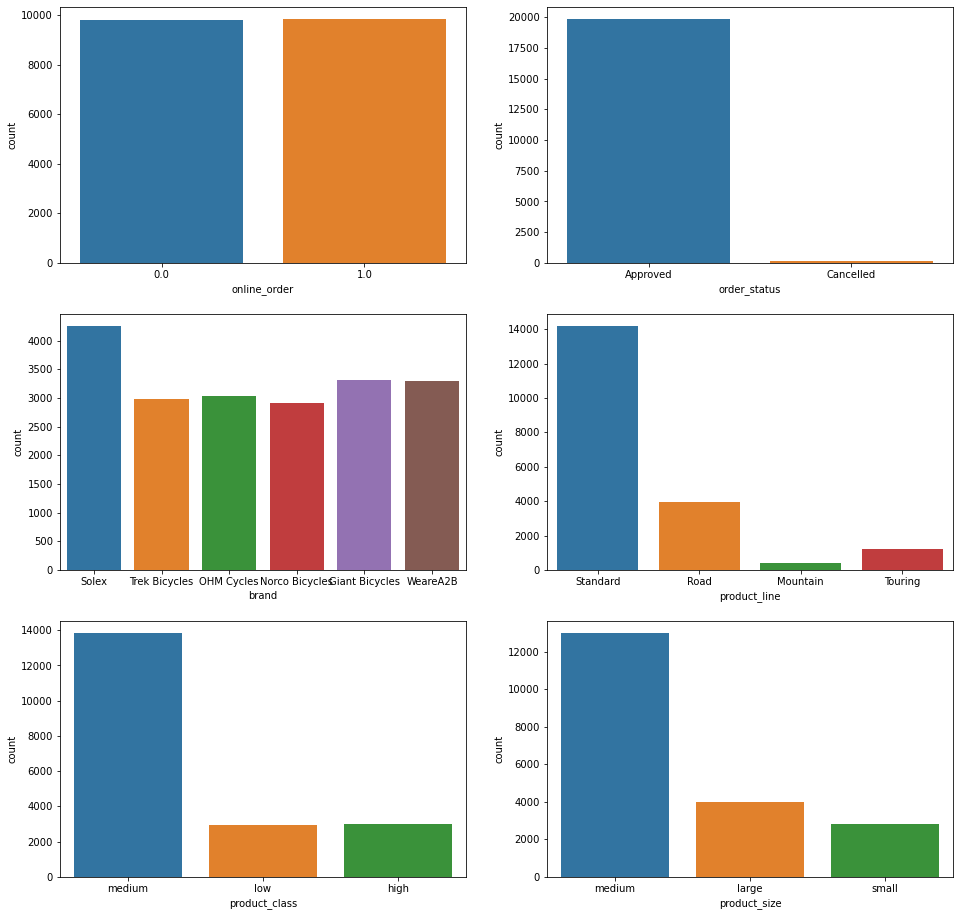

In [300]:
j=1
plt.rcParams['figure.figsize']=[16,16]
for i in transaction[['online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size']]:
    plt.subplot(3,2,j)
    sns.countplot(transaction[i])
    j+=1

In [301]:
len(transaction['transaction_id'].unique())

20000

In [302]:
#no duplicate transction ids, duplicate transaction records

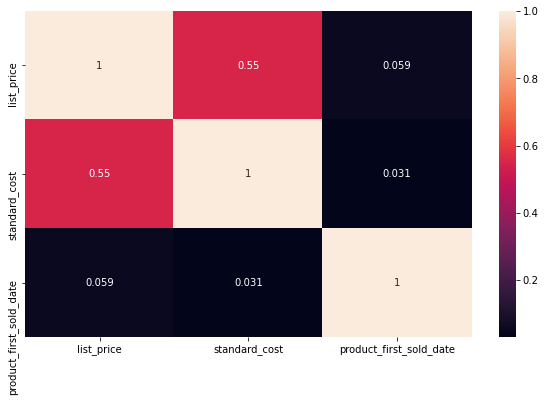

In [303]:
plt.figure(figsize=(10,6))
sns.heatmap(transaction[['list_price', 'standard_cost',
       'product_first_sold_date']].corr(),annot=True)

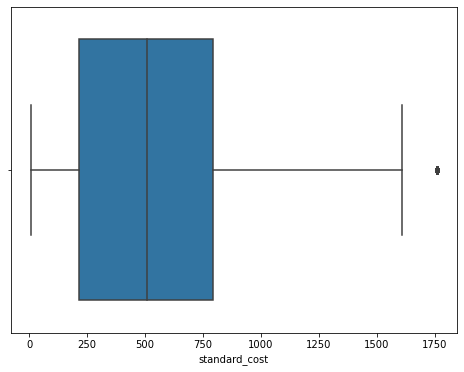

In [304]:
plt.rcParams['figure.figsize']=[8,6]
sns.boxplot(transaction['standard_cost'])

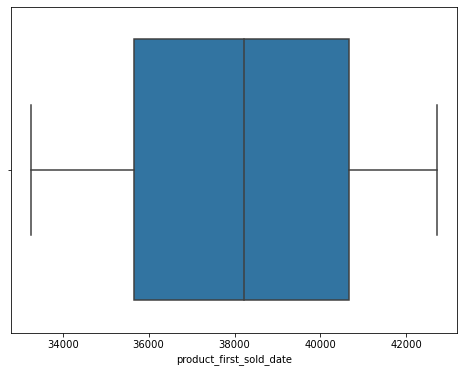

In [305]:
sns.boxplot(transaction['product_first_sold_date'])

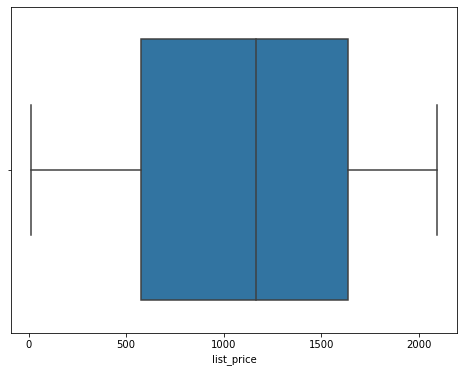

In [306]:
sns.boxplot(transaction['list_price'])

In [307]:
transaction['product_line']=transaction['product_line'].fillna('unknown')
transaction['product_class']=transaction['product_class'].fillna('unknown')
transaction['brand']=transaction['brand'].fillna('unknown')
transaction['product_size']=transaction['product_size'].fillna('unknown')

In [308]:
transaction_date=transaction['transaction_date']
year=pd.DatetimeIndex(transaction['transaction_date']).year
month=pd.DatetimeIndex(transaction['transaction_date']).month
day=pd.DatetimeIndex(transaction['transaction_date']).day
transaction['year']=year
transaction['month']=month
transaction['day']=day
transaction=transaction.drop('transaction_date',axis=1)

In [309]:
transaction.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'year', 'month', 'day'],
      dtype='object')

In [310]:
from sklearn.impute import KNNImputer


In [311]:
cat=pd.get_dummies(transaction[['order_status', 'brand', 'product_line', 'product_class',
       'product_size','year', 'month']],drop_first=True)
num=transaction[['list_price', 'standard_cost',
       'product_first_sold_date', 'day', 'online_order']]
X0=pd.concat([num,cat],axis=1)
imp=KNNImputer()
X0=pd.DataFrame(imp.fit_transform(X0),columns=X0.columns)

In [312]:
X0['online_order'].value_counts()

1.0    9845
0.0    9824
0.4     122
0.6     106
0.2      53
0.8      50
Name: online_order, dtype: int64

In [313]:
onl=[]
for i in X0['online_order']:
    if i>.5:
        onl.append(1)
    else:
        onl.append(0)
transaction['online_order']=onl

In [314]:
transaction[['standard_cost',
       'product_first_sold_date']]=X0[['standard_cost',
       'product_first_sold_date']]

In [315]:
for i in transaction[['online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size']]:
    print('\n\n',i)
    print(transaction[i].value_counts())



 online_order
1    10001
0     9999
Name: online_order, dtype: int64


 order_status
Approved     19821
Cancelled      179
Name: order_status, dtype: int64


 brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
unknown            197
Name: brand, dtype: int64


 product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
unknown       197
Name: product_line, dtype: int64


 product_class
medium     13826
high        3013
low         2964
unknown      197
Name: product_class, dtype: int64


 product_size
medium     12990
large       3976
small       2837
unknown      197
Name: product_size, dtype: int64


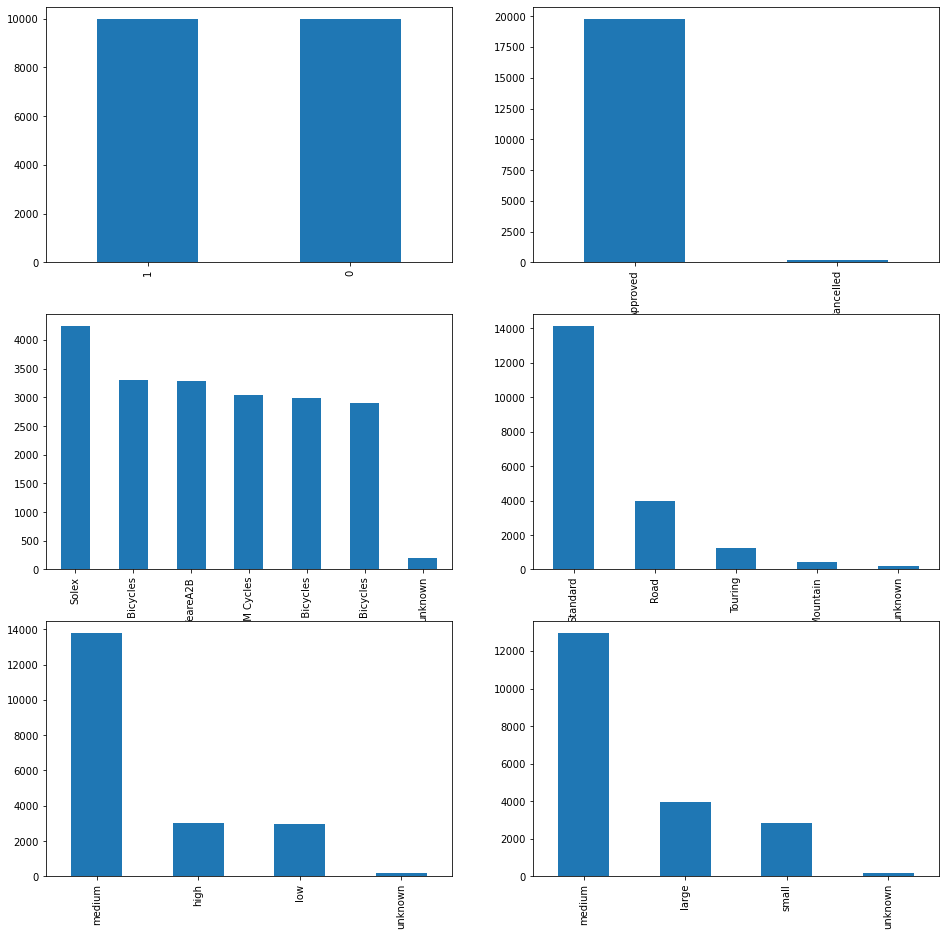

In [467]:
j=1
plt.figure(figsize=(16,16))
for i in transaction[['online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size']]:
    plt.subplot(3,2,j)
    transaction[i].value_counts().plot(kind='bar')
    j=j+1

In [316]:
transaction['transaction_date']=transaction_date

In [317]:
transaction.head()

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,year,month,day,transaction_date
0,1,2,2950,0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,2,25,2017-02-25
1,2,3,3120,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,5,21,2017-05-21
2,3,37,402,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017,10,16,2017-10-16
3,4,88,3135,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017,8,31,2017-08-31
4,5,78,787,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017,10,1,2017-10-01


# -----------------------------------------------------------------------------------------------

In [318]:
demographics.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [319]:
demographics=demographics[['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure']].copy(deep=True)

In [320]:
demographics.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [321]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [322]:
demographics.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [323]:
demographics['last_name']=demographics['last_name'].fillna('')

In [324]:
demographics['name']=demographics['first_name']+demographics['last_name']
demographics=demographics.drop(['first_name','last_name'],axis=1)

In [325]:
demographics.isna().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
name                                     0
dtype: int64

In [326]:
dob=demographics[['DOB']].copy(deep=True)

In [327]:
dob.sort_values(by='DOB')

,DOB
33,1843-12-21
719,1931-10-23
1091,1935-08-22
3409,1940-09-22
2412,1943-08-11
...,...
3778,NaT
3882,NaT
3930,NaT
3934,NaT


In [328]:
#On sorting the DOB 1843 is lowest age which is impossible hence will be dropped -33rd row
# Default column looks Irrelevant which needs to be dropped
demographics=demographics.drop('default',axis=1)

In [329]:
demographics=demographics.drop([33]).reset_index(drop=True)

In [330]:
demographics.shape

(3999, 11)

In [331]:

for i in demographics[['gender', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
        'owns_car']]:
    print('\n\n ',i)
    print(demographics[i].value_counts()/demographics.shape[0]*100)



  gender
Female    50.937734
Male      46.811703
U          2.175544
Femal      0.025006
F          0.025006
M          0.025006
Name: gender, dtype: float64


  job_title
Business Systems Development Analyst    1.125281
Tax Accountant                          1.100275
Social Worker                           1.100275
Internal Auditor                        1.050263
Recruiting Manager                      1.025256
                                          ...   
Database Administrator I                0.100025
Health Coach I                          0.075019
Research Assistant III                  0.075019
Health Coach III                        0.075019
Developer I                             0.025006
Name: job_title, Length: 195, dtype: float64


  job_industry_category
Manufacturing         19.979995
Financial Services    19.354839
Health                15.053763
Retail                 8.952238
Property               6.676669
IT                     5.551388
Entertainment          3

In [332]:
gen=demographics['gender']
g=[]
for i in gen:
    if i in ['Femal','F','Female']:
        g.append('Female')
    else:
        g.append('Male')
demographics['gender']=g

In [333]:
demographics['gender'].value_counts()

Female    2039
Male      1960
Name: gender, dtype: int64

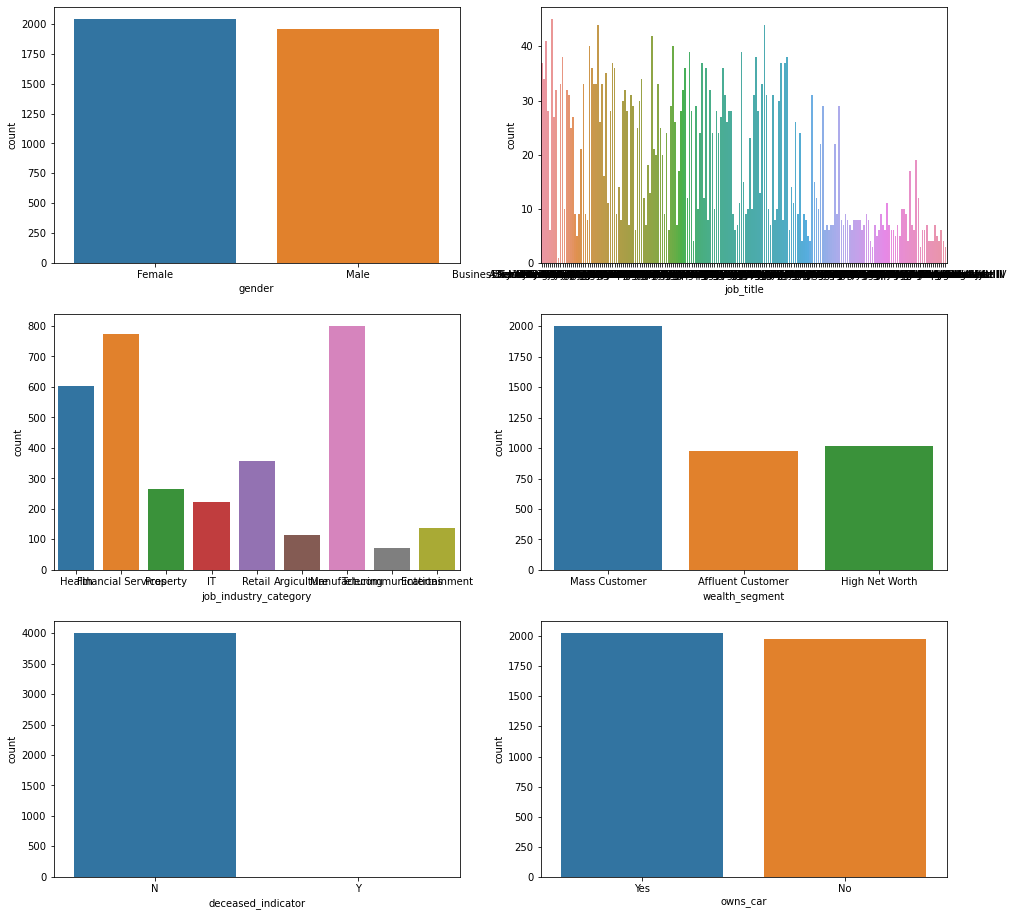

In [334]:
j=1
plt.rcParams['figure.figsize']=[16,16]
for i in demographics[['gender', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
        'owns_car']]:
    plt.subplot(3,2,j)
    sns.countplot(demographics[i])
    j+=1

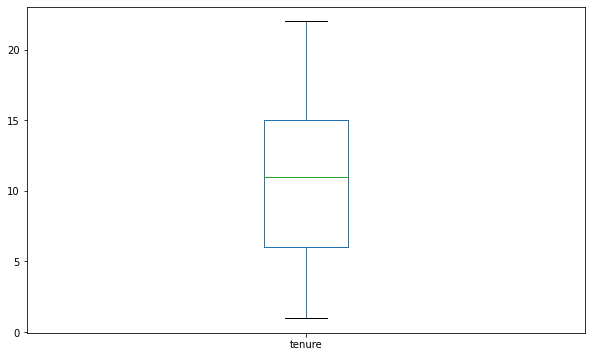

In [335]:
plt.figure(figsize=(10,6))
demographics['tenure'].plot(kind='box')

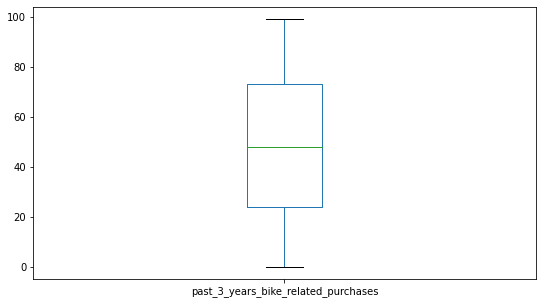

In [336]:
plt.figure(figsize=
          (9,5))
demographics['past_3_years_bike_related_purchases'].plot(kind='box')

In [337]:
demographics.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,name
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,LaraineMedendorp
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,EliBockman
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,ArlinDearle
3,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,Talbot
4,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,Sheila-kathrynCalton


In [338]:
#DoB to Month year day
demographics['Dob_Year']=pd.DatetimeIndex(demographics['DOB']).year
Dob_Month=pd.DatetimeIndex(demographics['DOB']).month
Dob_day=pd.DatetimeIndex(demographics['DOB']).day
DOB=demographics['DOB'].copy(deep=True)
demographics=demographics.drop('DOB',axis=1)

In [339]:
demographics['Age']=2021-demographics['Dob_Year']
demographics=demographics.drop(['Dob_Year'],axis=1)

In [340]:
demographics[['tenure','Age']]

,tenure,Age
0,11.0,68.0
1,16.0,41.0
2,15.0,67.0
3,7.0,60.0
4,8.0,44.0
...,...,...
3994,19.0,46.0
3995,1.0,20.0
3996,NaN,NaN
3997,10.0,48.0


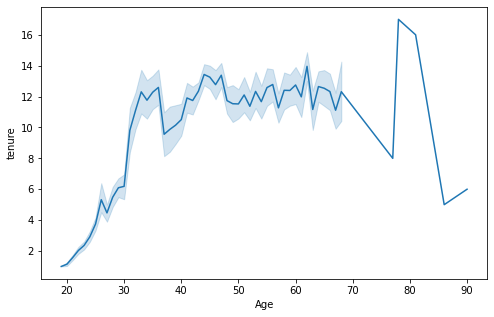

In [341]:
plt.figure(figsize=(8,5))
sns.lineplot(demographics['Age'],demographics['tenure'])

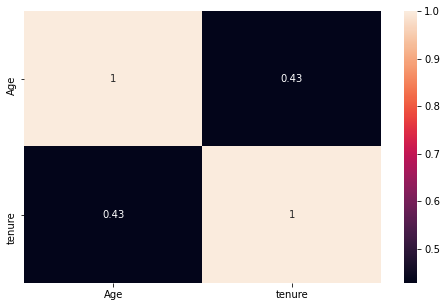

In [342]:
plt.figure(figsize=(8,5))
sns.heatmap(demographics[['Age','tenure']].corr(),annot=True)

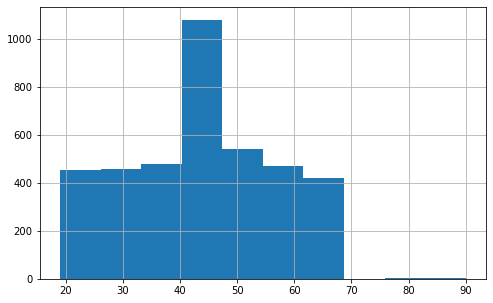

In [343]:
plt.figure(figsize=(8,5))
demographics['Age'].hist()

In [344]:
demographics[demographics['tenure'].isna()==True].isna().sum()# tenure and age has same to same nulls

customer_id                             0
gender                                  0
past_3_years_bike_related_purchases     0
job_title                               9
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                 87
name                                    0
Age                                    87
dtype: int64

In [345]:
len(demographics['job_title'].unique())

196

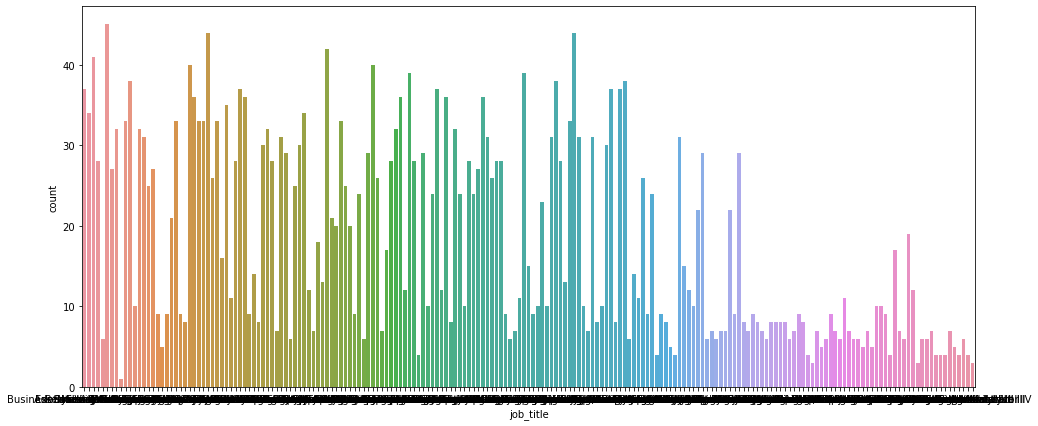

In [346]:
plt.figure(figsize=(16,7))
sns.countplot(demographics['job_title'])

In [347]:
demographics['job_title'].unique()

array(['Executive Secretary', 'Administrative Officer',
       'Recruiting Manager', nan, 'Senior Editor', 'Media Manager I',
       'Business Systems Development Analyst', 'Senior Quality Engineer',
       'Nuclear Power Engineer', 'Developer I', 'Account Executive',
       'Junior Executive', 'Media Manager IV', 'Sales Associate',
       'Professor', 'Geological Engineer', 'Project Manager',
       'Safety Technician I', 'Research Assistant I',
       'Accounting Assistant III', 'Editor', 'Research Nurse',
       'Safety Technician III', 'Staff Accountant III', 'Legal Assistant',
       'Product Engineer', 'Information Systems Manager',
       'VP Quality Control', 'Social Worker', 'Senior Cost Accountant',
       'Assistant Media Planner', 'Payment Adjustment Coordinator',
       'Food Chemist', 'Accountant III', 'Director of Sales',
       'Senior Financial Analyst', 'Registered Nurse',
       'Biostatistician II', 'Computer Systems Analyst II',
       'Software Test Engineer II', 

In [348]:
k=demographics['job_title']
n=['I','II','III','IV','V',]
l=[]
for i in range(3999):
    if type(k[i]) == str:
        m=k[i].split()
        s=''
        for j in m:
            if j in n:
                continue
            else:
                s=s+' '+j
        demographics['job_title'].iloc[i]=str.upper(s)

C:\Users\Patra\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [349]:
demographics['job_title'].unique()

array([' EXECUTIVE SECRETARY', ' ADMINISTRATIVE OFFICER',
       ' RECRUITING MANAGER', nan, ' SENIOR EDITOR', ' MEDIA MANAGER',
       ' BUSINESS SYSTEMS DEVELOPMENT ANALYST',
       ' SENIOR QUALITY ENGINEER', ' NUCLEAR POWER ENGINEER',
       ' DEVELOPER', ' ACCOUNT EXECUTIVE', ' JUNIOR EXECUTIVE',
       ' SALES ASSOCIATE', ' PROFESSOR', ' GEOLOGICAL ENGINEER',
       ' PROJECT MANAGER', ' SAFETY TECHNICIAN', ' RESEARCH ASSISTANT',
       ' ACCOUNTING ASSISTANT', ' EDITOR', ' RESEARCH NURSE',
       ' STAFF ACCOUNTANT', ' LEGAL ASSISTANT', ' PRODUCT ENGINEER',
       ' INFORMATION SYSTEMS MANAGER', ' VP QUALITY CONTROL',
       ' SOCIAL WORKER', ' SENIOR COST ACCOUNTANT',
       ' ASSISTANT MEDIA PLANNER', ' PAYMENT ADJUSTMENT COORDINATOR',
       ' FOOD CHEMIST', ' ACCOUNTANT', ' DIRECTOR OF SALES',
       ' SENIOR FINANCIAL ANALYST', ' REGISTERED NURSE',
       ' BIOSTATISTICIAN', ' COMPUTER SYSTEMS ANALYST',
       ' SOFTWARE TEST ENGINEER', ' PARALEGAL', ' VP SALES',
       ' C

In [350]:
demographics['job_title']=demographics['job_title'].fillna('UNKNOWN')
demographics['job_industry_category']=demographics['job_industry_category'].fillna('UNKNOWN')

In [351]:
demographics.isna().sum()

customer_id                             0
gender                                  0
past_3_years_bike_related_purchases     0
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                 87
name                                    0
Age                                    87
dtype: int64

In [352]:
len(demographics['name'].unique())

3997

In [353]:
name=demographics['name']
demographics=demographics.drop('name',axis=1)

In [354]:
from sklearn.impute import KNNImputer
cat=pd.get_dummies(demographics[['gender','job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car']],drop_first=True)
demographics['Age']=np.log(demographics['Age'])
num=demographics[['past_3_years_bike_related_purchases','tenure','Age']]
X0=pd.concat([cat,num],axis=1)
imp=KNNImputer()
X0=pd.DataFrame(imp.fit_transform(X0),columns=X0.columns)

In [355]:
demographics['tenure']=X0['tenure']
demographics['Age']=np.exp(X0['Age'])

In [356]:
demographics.isna().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

In [357]:
demographics.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Female,93,EXECUTIVE SECRETARY,Health,Mass Customer,N,Yes,11.0,68.0
1,2,Male,81,ADMINISTRATIVE OFFICER,Financial Services,Mass Customer,N,Yes,16.0,41.0
2,3,Male,61,RECRUITING MANAGER,Property,Mass Customer,N,Yes,15.0,67.0
3,4,Male,33,UNKNOWN,IT,Mass Customer,N,No,7.0,60.0
4,5,Female,56,SENIOR EDITOR,UNKNOWN,Affluent Customer,N,Yes,8.0,44.0


In [358]:
name['customer_id']=demographics['customer_id']

# -------------------------------------------------------------------------------------------------

In [359]:
cust_address.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'],
      dtype='object')

In [360]:
address=cust_address[['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation']].copy(deep=True)

In [361]:
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [362]:
len(address['address'].unique())

3996

In [363]:
address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [364]:
s1=['NSW','New South Wales']
s2=['VIC','Victoria']
for i in range(address.shape[0]):
    if address['state'].iloc[i] in  s1:
        address['state'].iloc[i]='NSW'
    elif address['state'].iloc[i] in  s2:
        address['state'].iloc[i]='VIC'
    else:
        address['state'].iloc[i]='QLD'

C:\Users\Patra\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [365]:
address['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [366]:
address['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [367]:
address['property_valuation'].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

In [368]:
address['postcode'].value_counts()

2170    31
2145    30
2155    30
2153    29
3977    26
        ..
3331     1
3036     1
3321     1
3305     1
2143     1
Name: postcode, Length: 873, dtype: int64

In [369]:
cust_add=address.copy(deep=True).drop(['address','country','postcode'],axis=1)

## ------------------------------------------------------------------------------------------------------

In [370]:
customer_detail=pd.merge(demographics,cust_add,on='customer_id',how='inner')

In [371]:
customer_detail.shape

(3995, 12)

## -------------------------------------------------------------------------------------------------------------

In [372]:
#concidering only those customer who has made purchases
cid=transaction['customer_id'].unique()
cid2=customer_detail['customer_id'].unique()
l=[]
for i in range(customer_detail.shape[0]):
    if customer_detail['customer_id'].iloc[i] in cid:
        continue
    else:
        l.append(i)
customer_detail=customer_detail.drop(l).reset_index(drop=True)

In [373]:
l=[]
for i in range(transaction.shape[0]):
    if transaction['customer_id'].iloc[i] in cid2:
        continue
    else:
        l.append(i)

transaction=transaction.drop(l).reset_index(drop=True)

In [374]:
transaction.shape,customer_detail.shape

((19959, 16), (3488, 12))

In [375]:
customer_detail.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation
0,1,Female,93,EXECUTIVE SECRETARY,Health,Mass Customer,N,Yes,11.0,68.0,NSW,10
1,2,Male,81,ADMINISTRATIVE OFFICER,Financial Services,Mass Customer,N,Yes,16.0,41.0,NSW,10
2,4,Male,33,UNKNOWN,IT,Mass Customer,N,No,7.0,60.0,QLD,9
3,5,Female,56,SENIOR EDITOR,UNKNOWN,Affluent Customer,N,Yes,8.0,44.0,NSW,4
4,6,Male,35,UNKNOWN,Retail,High Net Worth,N,Yes,13.0,55.0,VIC,9


In [376]:
transaction.head()

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,year,month,day,transaction_date
0,1,2,2950,0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,2,25,2017-02-25
1,2,3,3120,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,5,21,2017-05-21
2,3,37,402,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017,10,16,2017-10-16
3,4,88,3135,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017,8,31,2017-08-31
4,5,78,787,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017,10,1,2017-10-01


#### EDA

In [464]:
(customer_detail['property_valuation'].value_counts()/customer_detail.shape[0]*100)

9     16.427752
8     16.399083
10    14.277523
7     12.127294
11     6.995413
6      5.934633
5      5.619266
4      5.361239
12     4.845183
3      4.587156
1      3.985092
2      3.440367
Name: property_valuation, dtype: float64

# ----------------------------------------------------------------------------------------------------------

In [377]:
#RFM

In [378]:
frequency =pd.DataFrame(transaction['customer_id'].value_counts()).reset_index().rename(columns={'index':'customer_id',
                                                                                                'customer_id':'frequency'})
frequency.head()

,customer_id,frequency
0,1068,14
1,2476,14
2,2183,14
3,2464,13
4,2548,13


In [379]:
customer_detail.shape

(3488, 12)

In [380]:
gb=pd.DataFrame(transaction.groupby('customer_id')['transaction_date'].max()).reset_index()
gb

,customer_id,transaction_date
0,1,2017-12-23
1,2,2017-08-24
2,4,2017-06-18
3,5,2017-12-14
4,6,2017-10-27
...,...,...
3483,3496,2017-04-18
3484,3497,2017-11-08
3485,3498,2017-08-25
3486,3499,2017-11-09


In [381]:
today=[]
for i in range(3488):
    today.append((pd.to_datetime('2018-01-01').date()-gb['transaction_date'].iloc[i].date()).days)
gb['last_visit']=today

In [382]:
transaction['transaction_date'].max(),transaction['transaction_date'].min()

(Timestamp('2017-12-30 00:00:00'), Timestamp('2017-01-01 00:00:00'))

In [383]:
frequency=pd.merge(frequency,gb,on='customer_id').drop('transaction_date',axis=1)

freq=frequency.copy(deep=True)
frequency[['frequency','last_visit']]=sc.fit_transform(frequency[['frequency','last_visit']])
frequency.head()

,customer_id,frequency,last_visit
0,1068,3.559312,-0.982500
1,2476,3.559312,-0.809511
2,2183,3.559312,-0.913304
3,2464,3.129329,-1.017098
4,2548,3.129329,-0.999799


In [384]:
frequency.shape

(3488, 3)

In [385]:
categorical=transaction[['order_status','brand','product_line','product_class','product_size']].copy(deep=True)
categorical=pd.get_dummies(categorical)
categorical[['customer_id','online_order']]=transaction[['customer_id','online_order']]

categorical=categorical.groupby('customer_id').sum().reset_index()
categorical.head()

,customer_id,order_status_Approved,order_status_Cancelled,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,brand_unknown,...,product_line_unknown,product_class_high,product_class_low,product_class_medium,product_class_unknown,product_size_large,product_size_medium,product_size_small,product_size_unknown,online_order
0,1,11,0,4,2,2,2,1,0,0,...,0,1,2,8,0,0,9,2,0,6
1,2,3,0,1,0,0,0,0,2,0,...,0,0,0,3,0,0,3,0,0,1
2,4,2,0,1,0,0,1,0,0,0,...,0,0,0,2,0,1,1,0,0,1
3,5,6,0,1,2,0,1,1,1,0,...,0,1,2,3,0,2,2,2,0,2
4,6,5,0,2,0,0,0,1,2,0,...,0,1,0,4,0,1,4,0,0,2


In [386]:
categorical.shape

(3488, 24)

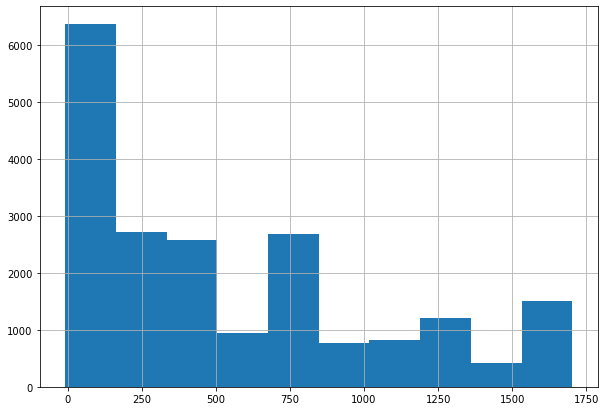

In [387]:
plt.rcParams['figure.figsize']=[10,7]
(transaction['list_price']-transaction['standard_cost']).hist()

In [388]:
gb2=transaction.groupby('customer_id')[['list_price','standard_cost']]
price=gb2.max().join(gb2.min(),lsuffix='_max',rsuffix='_min').join(gb2.sum())
price.head()

,list_price_max,standard_cost_max,list_price_min,standard_cost_min,list_price,standard_cost
customer_id,,,,,,
1,1720.70,1531.42,71.49,53.62,9084.45,6066.36
2,1992.93,954.82,752.64,205.36,4149.07,1922.81
4,569.56,528.43,478.16,298.72,1047.72,827.15
5,1812.75,1043.77,290.62,215.14,5903.20,3508.26
6,1807.45,778.69,230.91,108.76,5931.69,1985.14


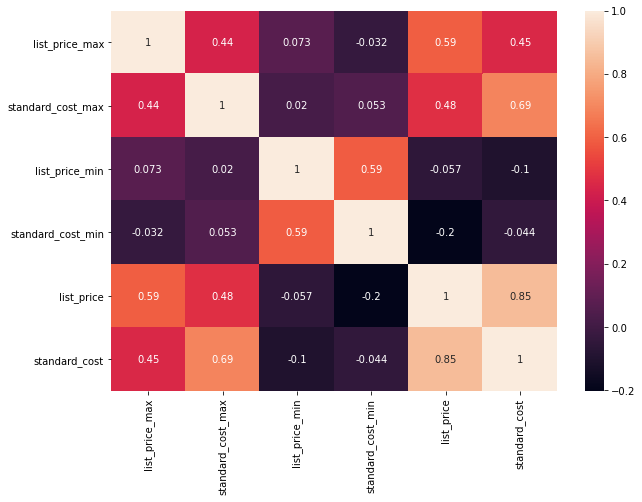

In [389]:
plt.rcParams['figure.figsize']=[10,7]
sns.heatmap(price.corr(),annot=True)

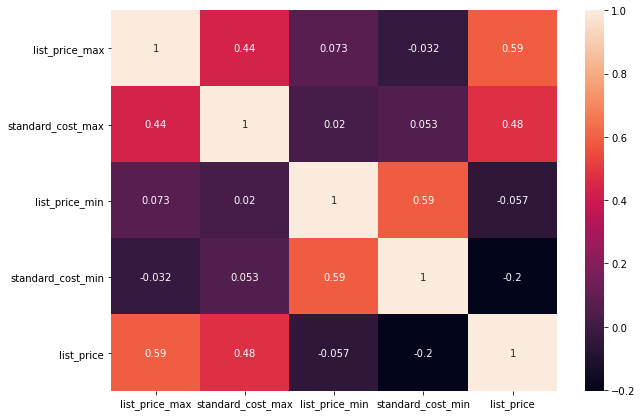

In [390]:
plt.rcParams['figure.figsize']=[10,7]
sns.heatmap(price.drop('standard_cost',axis=1).corr(),annot=True)


In [391]:
#due to under lying collinearity we decided to  use the discount amount instead of the price
discount=transaction[['customer_id']].copy(deep=True)
discount['discount']=transaction['list_price']-transaction['standard_cost']
gb3=discount.groupby('customer_id')

In [392]:
disc=gb3.max().join(gb3.min(),lsuffix='_max',rsuffix='_min')
disc['total_cost']=price['standard_cost']
disc=disc.reset_index()

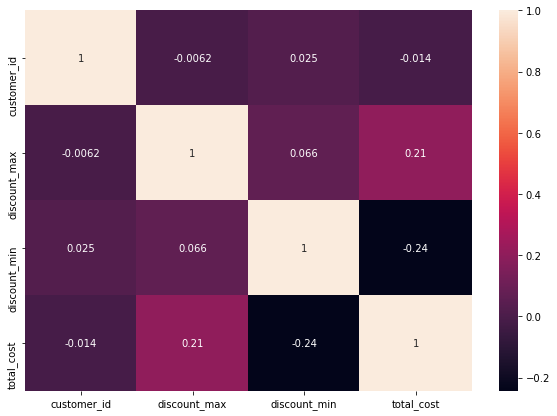

In [393]:
plt.rcParams['figure.figsize']=[10,7]
sns.heatmap(disc.corr(),annot=True)


In [394]:
#we will move forward with disc
disc_copy=disc.copy(deep=True)
disc[['discount_max','discount_min','total_cost']]=sc.fit_transform(disc[['discount_max','discount_min','total_cost']])
disc.head()

,customer_id,discount_max,discount_min,total_cost
0,1,-1.021212,-0.618356,1.770937
1,2,0.097734,2.072757,-0.772504
2,4,-2.355645,-0.473060,-1.445054
3,5,0.097664,-0.258488,0.200695
4,6,1.102983,-0.369365,-0.734244


In [395]:
disc.shape

(3488, 4)

In [396]:
final_data=pd.merge(frequency,pd.merge(categorical,disc,on='customer_id'),on='customer_id')
final_data.head()

,customer_id,frequency,last_visit,order_status_Approved,order_status_Cancelled,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,...,product_class_medium,product_class_unknown,product_size_large,product_size_medium,product_size_small,product_size_unknown,online_order,discount_max,discount_min,total_cost
0,1068,3.559312,-0.982500,14,0,4,2,1,3,2,...,11,0,3,8,3,0,6,0.097664,-0.473060,3.825112
1,2476,3.559312,-0.809511,14,0,0,6,1,2,1,...,11,0,4,8,2,0,6,0.212365,-0.700000,2.396493
2,2183,3.559312,-0.913304,14,0,6,1,3,3,1,...,9,0,3,8,3,0,4,-0.309614,-0.369365,5.755722
3,2464,3.129329,-1.017098,13,0,4,2,1,2,3,...,8,0,5,8,0,0,3,0.831535,-0.473060,2.194849
4,2548,3.129329,-0.999799,12,1,3,1,2,4,0,...,9,0,2,9,2,0,4,-0.277559,-0.160603,2.921705


In [397]:
final_data.shape

(3488, 29)

# -----------------------------------------------------------------------------------------------

In [398]:
customer_detail.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'Age', 'state',
       'property_valuation'],
      dtype='object')

In [399]:
customer_detail.job_title.unique()

array([' EXECUTIVE SECRETARY', ' ADMINISTRATIVE OFFICER', 'UNKNOWN',
       ' SENIOR EDITOR', ' MEDIA MANAGER',
       ' BUSINESS SYSTEMS DEVELOPMENT ANALYST', ' NUCLEAR POWER ENGINEER',
       ' DEVELOPER', ' ACCOUNT EXECUTIVE', ' JUNIOR EXECUTIVE',
       ' SALES ASSOCIATE', ' PROFESSOR', ' GEOLOGICAL ENGINEER',
       ' PROJECT MANAGER', ' SAFETY TECHNICIAN', ' RESEARCH ASSISTANT',
       ' ACCOUNTING ASSISTANT', ' EDITOR', ' RESEARCH NURSE',
       ' SENIOR QUALITY ENGINEER', ' STAFF ACCOUNTANT',
       ' LEGAL ASSISTANT', ' PRODUCT ENGINEER',
       ' INFORMATION SYSTEMS MANAGER', ' VP QUALITY CONTROL',
       ' SOCIAL WORKER', ' SENIOR COST ACCOUNTANT',
       ' ASSISTANT MEDIA PLANNER', ' PAYMENT ADJUSTMENT COORDINATOR',
       ' FOOD CHEMIST', ' ACCOUNTANT', ' DIRECTOR OF SALES',
       ' SENIOR FINANCIAL ANALYST', ' REGISTERED NURSE',
       ' BIOSTATISTICIAN', ' COMPUTER SYSTEMS ANALYST',
       ' SOFTWARE TEST ENGINEER', ' PARALEGAL', ' VP SALES',
       ' CHIEF DESIGN ENGIN

In [400]:
k=[]
for i in customer_detail['job_title']:
    k.append(i.split()[-1])
pd.DataFrame(k).value_counts()

ENGINEER           429
UNKNOWN            421
MANAGER            241
ANALYST            216
ASSISTANT          204
ACCOUNTANT         141
SPECIALIST         118
PROFESSOR           96
TECHNICIAN          92
NURSE               91
DEVELOPER           73
ASSOCIATE           71
EXECUTIVE           61
REPRESENTATIVE      58
ADMINISTRATOR       55
SALES               55
DESIGNER            52
OPERATOR            49
PROGRAMMER          44
COORDINATOR         39
EDITOR              39
WORKER              38
SECRETARY           36
AUDITOR             36
OFFICER             33
PLANNER             32
STATISTICIAN        31
PATHOLOGIST         31
WRITER              31
HYGIENIST           31
CHEMIST             30
CONTROL             30
MANAGEMENT          30
RECRUITER           30
BIOSTATISTICIAN     27
MARKETING           27
TEACHER             27
ACCOUNTING          27
PARALEGAL           27
LIBRARIAN           26
PRACTICIONER        25
GEOLOGIST           25
PHARMACIST          25
SCIENTIST  

In [401]:
customer_detail['job_title']=k

In [402]:
c_info=customer_detail[['gender','job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'state','property_valuation']].copy(deep=True)
c_info['job_title']=k
c_info=pd.get_dummies(c_info,drop_first=True)
c_info['customer_id']=customer_detail['customer_id']
c_info.head()

,property_valuation,gender_Male,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,...,job_title_SPECIALIST,job_title_STATISTICIAN,job_title_TEACHER,job_title_TECH,job_title_TECHNICIAN,job_title_THERAPIST,job_title_UNKNOWN,job_title_WORKER,job_title_WRITER,customer_id
0,10,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,9,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,9,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,6


In [403]:
numeric=sc.fit_transform(customer_detail[['past_3_years_bike_related_purchases', 'tenure', 'Age']])
numeric=pd.DataFrame(numeric,columns=['past_3_years_bike_related_purchases', 'tenure', 'Age'])
numeric['customer_id']=customer_detail['customer_id']
numeric.head()

,past_3_years_bike_related_purchases,tenure,Age,customer_id
0,1.545330,0.054668,1.940004,1
1,1.125850,0.943873,-0.225260,2
2,-0.552071,-0.656696,1.298444,4
3,0.251933,-0.478855,0.015325,5
4,-0.482158,0.410350,0.897470,6


In [404]:
details=pd.merge(c_info,numeric,on='customer_id')
details.shape

(3488, 72)

In [405]:
data=pd.merge(final_data,details,on='customer_id')
data.shape

(3488, 100)

# ----------------------------------------------------------------------------------------------------

In [406]:
data.head()

,customer_id,frequency,last_visit,order_status_Approved,order_status_Cancelled,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,...,job_title_TEACHER,job_title_TECH,job_title_TECHNICIAN,job_title_THERAPIST,job_title_UNKNOWN,job_title_WORKER,job_title_WRITER,past_3_years_bike_related_purchases,tenure,Age
0,1068,3.559312,-0.982500,14,0,4,2,1,3,2,...,0,0,0,0,1,0,0,-1.530858,-1.368061,-1.428184
1,2476,3.559312,-0.809511,14,0,0,6,1,2,1,...,0,0,0,0,0,0,0,-1.251205,1.121714,1.699419
2,2183,3.559312,-0.913304,14,0,6,1,3,3,1,...,0,0,0,0,0,0,0,0.426716,-0.656696,0.416300
3,2464,3.129329,-1.017098,13,0,4,2,1,2,3,...,0,0,0,0,0,0,0,1.020980,-0.834538,-0.465845
4,2548,3.129329,-0.999799,12,1,3,1,2,4,0,...,0,0,0,0,0,0,0,-1.321118,0.410350,0.496495


In [407]:
from sklearn.decomposition import PCA

In [408]:
pca=PCA()
X=np.array(data.drop('customer_id',axis=1))
pca.fit(X)

PCA()

In [409]:
var=pca.explained_variance_ratio_
var

array([3.72021490e-01, 1.62085696e-01, 4.89998430e-02, 4.20487468e-02,
       3.38990183e-02, 2.92315330e-02, 2.68515136e-02, 2.43200291e-02,
       2.35960792e-02, 2.08777194e-02, 2.01133665e-02, 1.81812058e-02,
       1.68282567e-02, 1.61550151e-02, 1.56605057e-02, 1.49792193e-02,
       1.31806445e-02, 1.13776644e-02, 9.91788371e-03, 7.23287441e-03,
       6.99182898e-03, 5.22738551e-03, 5.05043457e-03, 5.00562490e-03,
       4.56615849e-03, 4.23060000e-03, 3.64211767e-03, 3.29932141e-03,
       3.19155972e-03, 2.44388565e-03, 2.25618023e-03, 2.14902907e-03,
       2.05321452e-03, 1.90938026e-03, 1.72278326e-03, 1.51597370e-03,
       1.41511739e-03, 1.19949756e-03, 1.15911642e-03, 1.11484174e-03,
       9.69240786e-04, 8.31730613e-04, 6.49965912e-04, 5.39063318e-04,
       5.04799488e-04, 4.69395346e-04, 4.16781734e-04, 4.04353062e-04,
       3.87575275e-04, 3.42559162e-04, 3.18138701e-04, 3.14780109e-04,
       3.04538064e-04, 2.88503967e-04, 2.67356656e-04, 2.45424885e-04,
      

In [411]:
print('Cumulative sum of the explained variance of the components in %')
#print(np.round(np.cumsum(var)*100,2)) # all the principle components explains in total 100 percent variance in the data
pd.Series(np.round(np.cumsum(var)*100,2),index=np.arange(1,100)).head(45)

Cumulative sum of the explained variance of the components in %


1     37.20
2     53.41
3     58.31
4     62.52
5     65.91
6     68.83
7     71.51
8     73.95
9     76.31
10    78.39
11    80.40
12    82.22
13    83.91
14    85.52
15    87.09
16    88.58
17    89.90
18    91.04
19    92.03
20    92.76
21    93.46
22    93.98
23    94.48
24    94.98
25    95.44
26    95.86
27    96.23
28    96.56
29    96.88
30    97.12
31    97.35
32    97.56
33    97.77
34    97.96
35    98.13
36    98.28
37    98.42
38    98.54
39    98.66
40    98.77
41    98.87
42    98.95
43    99.02
44    99.07
45    99.12
dtype: float64

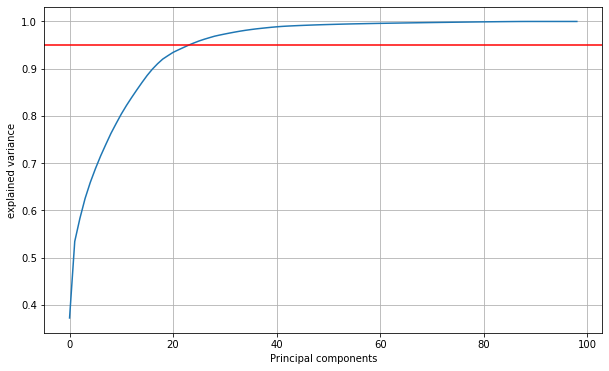

In [412]:
plt.rcParams['figure.figsize']=[10,6]
plt.plot(np.cumsum(var))
plt.axhline(.95,color='r')
plt.xlabel('Principal components')
plt.ylabel('explained variance')
plt.grid()
plt.show()

In [413]:
# principle component = 45 concidering 99 % variance in the data

In [414]:
pca=PCA(n_components=25,random_state=110)
pca_X=pca.fit_transform(X)

In [415]:
pca_X.shape

(3488, 25)

In [416]:
pca_df=pd.DataFrame(pca_X,columns=np.arange(1,26))
pca_df.shape

(3488, 25)

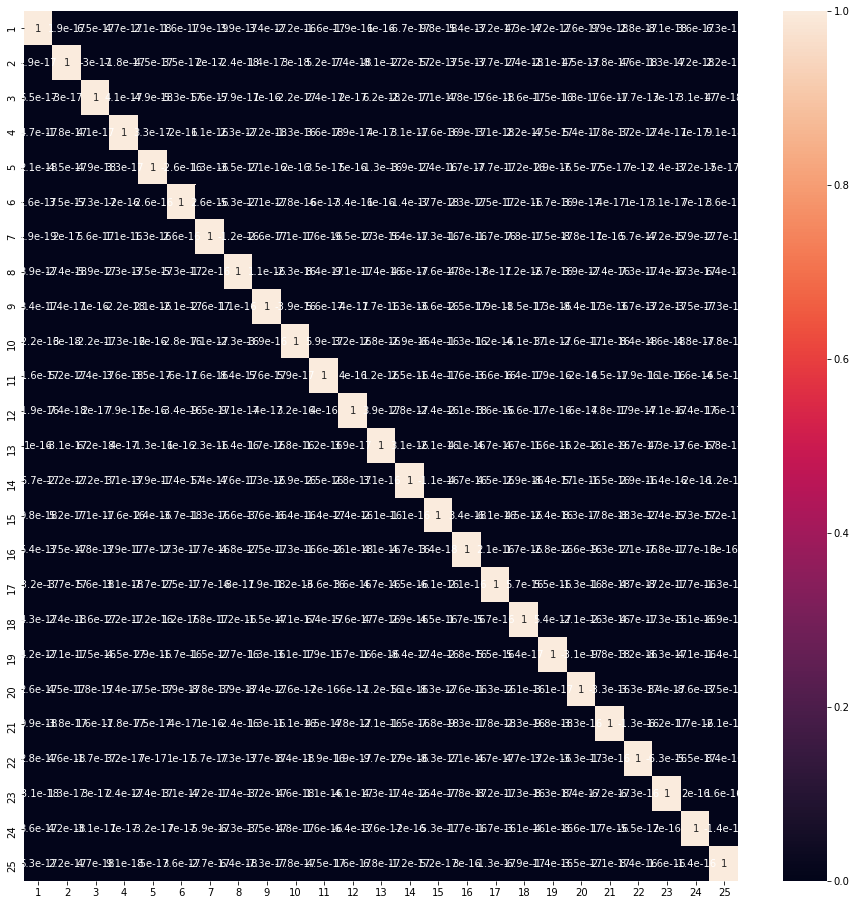

In [417]:
plt.rcParams['figure.figsize']=[16,16]
sns.heatmap(pca_df.corr(),annot=True)

In [418]:
#KNN
from sklearn.cluster import KMeans
pca_X2=np.array(pca_df)#transformed values
pca_X2.shape

(3488, 25)

In [419]:
inertia=[]
for i in range(1,10):
    k_clusters=KMeans(n_clusters=i,random_state=42,n_init=10)
    k_clusters.fit(pca_X2)
    inertia.append(k_clusters.inertia_)
inertia=pd.DataFrame(inertia,columns=['error'])
inertia['no_of_clusters']=np.arange(1,10)

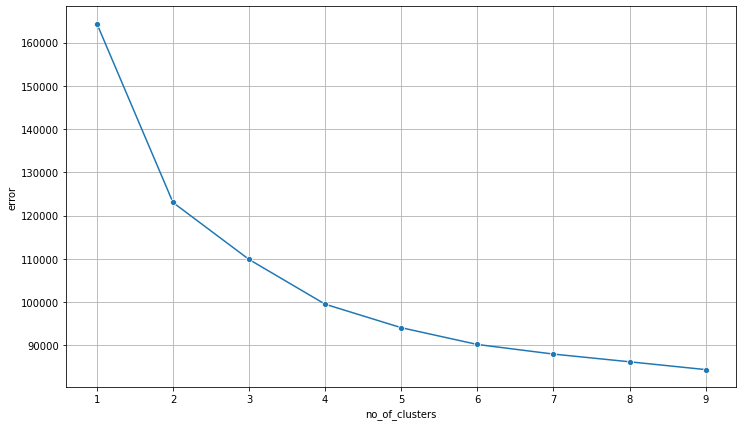

In [420]:
plt.rcParams['figure.figsize']=[12,7]
sns.lineplot(inertia['no_of_clusters'],inertia['error'],marker='o')
plt.grid()

In [421]:
#using silhoutte  score to evaluate the cluster formed  and comparing the models
from sklearn import metrics

In [422]:
# no of clusters selected is 3 clusters, concidering minimum change too ,
cluster=KMeans(n_init=10,n_clusters=3,random_state=42)
cluster.fit(pca_X2)

KMeans(n_clusters=3, random_state=42)

In [423]:
centroids=cluster.cluster_centers_
centroids=pd.DataFrame(centroids,columns=np.arange(1,26))
centroids

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,-0.978386,3.917424,0.016461,0.012607,0.016118,-0.000157,0.010448,0.011707,-0.032242,0.028757,...,-0.042385,-0.040446,0.007463,-0.051289,0.012229,-0.011706,0.012970,-0.006645,0.010958,-0.031886
1,-3.079506,-1.367246,-0.002163,0.016216,0.015772,0.004337,-0.022778,0.001299,-0.011694,0.017375,...,0.000557,0.010351,-0.000795,-0.008044,-0.002456,0.004602,-0.006511,-0.003691,-0.010224,0.007461
2,4.466458,-0.758864,-0.007667,-0.028216,-0.029874,-0.005322,0.021894,-0.009001,0.034934,-0.039840,...,0.026009,0.012542,-0.003708,0.042372,-0.004634,0.001622,-0.000031,0.008801,0.005878,0.010762


In [424]:
k_df=pca_df.copy(deep=True)
k_df['label']=cluster.labels_
k_df['label'].value_counts()

1    1514
2    1211
0     763
Name: label, dtype: int64

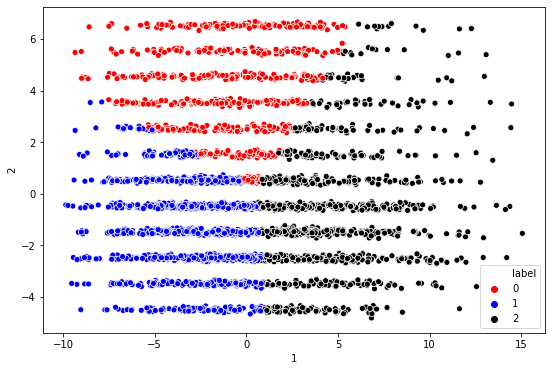

In [479]:
plt.figure(figsize=(9,6))
sns.scatterplot(k_df[1],k_df[2],hue=k_df['label'],palette=['red','blue','black'])

In [425]:
metrics.silhouette_score(k_df.drop('label',axis=1),k_df['label']) ## K means clustering

0.1704949087069597

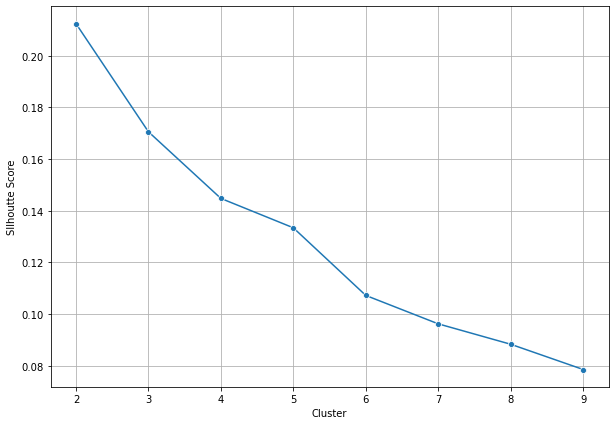

In [426]:
s=[]
for i in range(2,10):
    c=KMeans(n_clusters=i)
    c.fit(pca_X2)
    labels=c.labels_
    s.append(metrics.silhouette_score(pca_X2,labels))
plt.rcParams['figure.figsize']=[10,7]
sns.lineplot(np.arange(2,10),s,marker='o')
plt.grid()
plt.xlabel('Cluster')
plt.ylabel('SIlhoutte Score')
plt.show()

In [427]:
data['labels']=k_df['label']
data['labels'].value_counts()

1    1514
2    1211
0     763
Name: labels, dtype: int64

In [428]:
cust_label=data[['customer_id','labels']].copy(deep=True)
cust_label=pd.merge(customer_detail,cust_label,on='customer_id')
cust_label=pd.merge(cust_label,pd.merge(disc_copy,freq ,on='customer_id'),on='customer_id')

#### analyzing frequency of visits

In [429]:
cust_label[cust_label['labels']==0].sort_values(by='frequency',ascending=False).head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,labels,discount_max,discount_min,total_cost,frequency,last_visit
255,261,Male,74,ENGINEER,UNKNOWN,Mass Customer,N,No,8.0,44.0,NSW,1,0,957.02,64.51,5104.52,9,52
31,37,Female,46,WORKER,Health,High Net Worth,N,No,16.0,36.0,QLD,1,0,1702.55,15.08,4953.22,9,9
713,719,Male,2,OFFICER,Retail,Mass Customer,N,No,14.0,68.0,QLD,1,0,1630.25,144.26,7339.81,9,13
2010,2019,Female,48,MARKETING,Entertainment,High Net Worth,N,No,17.0,68.0,QLD,2,0,1702.55,75.75,4550.44,9,54
2651,2662,Female,53,ACCOUNTANT,Property,Mass Customer,N,Yes,16.0,44.0,NSW,2,0,1702.55,14.23,4045.74,9,64


In [430]:
cust_label[cust_label['labels']==1].sort_values(by='frequency',ascending=False).head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,labels,discount_max,discount_min,total_cost,frequency,last_visit
213,219,Male,9,ADMINISTRATOR,Health,Mass Customer,N,No,7.0,57.0,NSW,8,1,808.78,75.75,5418.46,7,42
690,696,Male,57,ANALYST,UNKNOWN,Affluent Customer,N,Yes,6.0,55.0,NSW,10,1,903.11,4.80,2518.44,7,23
2224,2234,Male,48,ENGINEER,Manufacturing,Mass Customer,N,No,18.0,35.0,NSW,12,1,1215.34,4.80,1785.78,7,59
485,491,Male,45,PATHOLOGIST,Property,Affluent Customer,N,Yes,19.0,45.0,VIC,10,1,1069.55,64.93,3404.96,7,70
50,56,Male,44,SALES,Property,Mass Customer,N,Yes,4.0,25.0,NSW,10,1,802.26,4.80,3785.62,7,4


In [431]:
cust_label[cust_label['labels']==2].sort_values(by='frequency',ascending=False).head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,labels,discount_max,discount_min,total_cost,frequency,last_visit
1060,1068,Male,5,UNKNOWN,Health,Mass Customer,N,Yes,3.0,26.0,NSW,8,2,1230.27,41.13,9412.84,14,6
2173,2183,Female,61,ANALYST,Manufacturing,Mass Customer,N,Yes,7.0,49.0,QLD,4,2,1055.82,57.73,12558.02,14,10
2466,2476,Male,13,OFFICER,Property,High Net Worth,N,No,17.0,65.0,QLD,5,2,1279.40,4.80,7085.46,14,16
3037,3048,Male,38,ASSISTANT,Manufacturing,Mass Customer,N,No,16.0,52.0,VIC,1,2,1630.25,64.93,6376.13,13,6
1132,1140,Female,32,SECRETARY,UNKNOWN,Mass Customer,N,Yes,13.0,35.0,NSW,10,2,1592.19,45.96,7666.01,13,8


#### analyzing costs and discount

In [432]:
cust_label[cust_label['labels']==0].sort_values(by='total_cost').head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,labels,discount_max,discount_min,total_cost,frequency,last_visit
3178,3189,Male,40,SPECIALIST,Financial Services,Mass Customer,N,No,11.0,58.0,QLD,3,0,25.09,25.09,150.52,2,58
864,872,Female,47,ENGINEER,IT,Mass Customer,N,No,13.0,50.0,NSW,3,0,75.48,75.48,215.14,1,173
1895,1904,Female,60,WRITER,IT,High Net Worth,N,Yes,14.0,43.0,NSW,1,0,1383.61,110.56,349.73,3,69
2852,2863,Male,90,AUDITOR,Manufacturing,Mass Customer,N,No,16.0,56.0,NSW,3,0,167.21,167.21,376.84,1,177
1748,1757,Male,68,UNKNOWN,IT,High Net Worth,N,No,7.0,55.0,QLD,3,0,827.16,827.16,400.91,1,231


In [433]:
cust_label[cust_label['labels']==2].sort_values(by='total_cost').head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,labels,discount_max,discount_min,total_cost,frequency,last_visit
56,62,Female,38,UNKNOWN,IT,Mass Customer,N,Yes,22.0,42.0,NSW,8,2,1630.25,14.23,925.07,6,7
226,232,Female,94,PROFESSOR,Retail,Mass Customer,N,No,12.0,34.0,NSW,9,2,1612.25,15.08,974.85,6,143
2289,2299,Male,11,ANALYST,Property,High Net Worth,N,Yes,7.0,35.0,VIC,10,2,1215.34,17.87,1216.57,6,61
2042,2051,Female,8,ENGINEER,Manufacturing,Affluent Customer,N,No,20.0,62.0,NSW,12,2,1660.88,57.73,1236.27,6,53
289,295,Female,64,ADMINISTRATOR,UNKNOWN,Mass Customer,N,Yes,18.0,57.0,QLD,6,2,1592.19,4.80,1416.56,7,36


In [434]:
cust_label[cust_label['labels']==1].sort_values(by='total_cost',ascending=True).head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,labels,discount_max,discount_min,total_cost,frequency,last_visit
2342,2352,Female,76,STATISTICIAN,UNKNOWN,Mass Customer,N,Yes,13.0,50.0,VIC,10,1,1279.40,1279.40,13.44,1,38
3279,3292,Male,71,DESIGNER,Retail,Affluent Customer,N,Yes,3.0,48.0,NSW,10,1,15.08,15.08,45.26,1,303
2522,2532,Female,27,UNKNOWN,Manufacturing,Mass Customer,N,No,11.0,52.0,NSW,11,1,17.87,17.87,53.62,1,142
2261,2271,Male,96,UNKNOWN,Telecommunications,Mass Customer,N,Yes,18.0,47.0,NSW,8,1,1305.25,1305.25,57.74,1,179
2318,2328,Male,63,HYGIENIST,Health,Mass Customer,N,Yes,8.0,35.0,QLD,8,1,356.50,356.50,84.99,1,153


In [435]:
cust_label[cust_label['labels']==0].sort_values(by='total_cost',ascending=False).head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,labels,discount_max,discount_min,total_cost,frequency,last_visit
1309,1317,Male,2,MANAGER,Retail,Mass Customer,N,Yes,5.0,48.0,QLD,2,0,1702.55,41.13,8346.10,9,12
713,719,Male,2,OFFICER,Retail,Mass Customer,N,No,14.0,68.0,QLD,1,0,1630.25,144.26,7339.81,9,13
519,525,Male,64,ENGINEER,Manufacturing,Mass Customer,N,Yes,9.0,41.0,VIC,2,0,903.11,17.87,6787.85,8,121
776,782,Female,30,ENGINEER,Manufacturing,Mass Customer,N,No,17.0,45.0,QLD,3,0,1702.55,144.26,6589.31,6,27
1353,1361,Male,56,PROFESSOR,Manufacturing,Affluent Customer,N,No,19.0,57.0,VIC,4,0,1010.02,64.93,6247.15,7,30


In [436]:
cust_label[cust_label['labels']==1].sort_values(by='total_cost',ascending=False).head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,labels,discount_max,discount_min,total_cost,frequency,last_visit
876,884,Male,11,DESIGNER,Property,Mass Customer,N,No,17.0,43.0,VIC,10,1,957.02,195.22,7956.02,6,3
3480,3493,Male,30,ASSISTANT,Health,High Net Worth,N,No,18.0,57.0,NSW,10,1,1408.91,129.01,6324.94,6,95
458,464,Female,32,UNKNOWN,UNKNOWN,Mass Customer,N,Yes,10.0,63.0,VIC,11,1,709.34,144.26,6186.87,6,11
2480,2490,Male,28,UNKNOWN,Health,Mass Customer,N,Yes,5.0,34.0,NSW,10,1,1010.02,129.01,6152.54,5,40
2394,2404,Male,13,DESIGNER,Retail,Mass Customer,N,No,6.0,61.0,NSW,11,1,1702.55,90.10,6108.06,6,4


In [437]:
cust_label[cust_label['labels']==2].sort_values(by='total_cost',ascending=False).head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,labels,discount_max,discount_min,total_cost,frequency,last_visit
2173,2183,Female,61,ANALYST,Manufacturing,Mass Customer,N,Yes,7.0,49.0,QLD,4,2,1055.82,57.73,12558.02,14,10
1294,1302,Female,29,BIOSTATISTICIAN,Financial Services,Affluent Customer,N,Yes,2.0,23.0,QLD,7,2,1295.43,14.23,11699.10,13,31
1121,1129,Male,2,MARKETING,Entertainment,Mass Customer,N,Yes,9.0,44.0,QLD,8,2,1230.30,64.93,11558.58,13,28
1060,1068,Male,5,UNKNOWN,Health,Mass Customer,N,Yes,3.0,26.0,NSW,8,2,1230.27,41.13,9412.84,14,6
211,217,Female,63,UNKNOWN,Manufacturing,High Net Worth,N,No,16.0,42.0,NSW,11,2,737.17,64.51,9129.56,8,6


In [438]:
cust_label[cust_label['labels']==0].sort_values(by=['discount_max','discount_min'],ascending=False).head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,labels,discount_max,discount_min,total_cost,frequency,last_visit
1258,1266,Male,68,MANAGER,Health,Mass Customer,N,Yes,10.0,43.0,QLD,1,0,1702.55,1702.55,777.84,2,259
563,569,Male,30,MANAGER,IT,Mass Customer,N,No,10.0,45.0,NSW,2,0,1702.55,1295.43,1476.19,4,100
1603,1612,Male,70,SPECIALIST,Financial Services,High Net Worth,N,Yes,22.0,34.0,NSW,4,0,1702.55,1230.27,971.40,2,69
1097,1105,Male,39,MANAGER,UNKNOWN,Mass Customer,N,No,18.0,31.0,NSW,4,0,1702.55,1010.02,1252.87,2,18
2609,2619,Female,62,DESIGNER,Financial Services,High Net Worth,N,Yes,14.0,43.0,QLD,3,0,1702.55,957.02,1209.70,2,78


In [439]:
cust_label[cust_label['labels']==1].sort_values(by=['discount_max','discount_min'],ascending=False).head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,labels,discount_max,discount_min,total_cost,frequency,last_visit
3029,3040,Female,87,MANAGER,Retail,Mass Customer,N,No,5.0,55.000000,NSW,9,1,1702.55,1279.40,402.36,2,205
2734,2745,Female,8,ENGINEER,Manufacturing,Mass Customer,N,Yes,18.0,44.000000,NSW,8,1,1702.55,1069.55,550.52,2,269
3048,3059,Male,83,ACCOUNTANT,UNKNOWN,Mass Customer,N,No,17.0,63.000000,VIC,7,1,1702.55,1028.76,1167.61,2,144
1619,1628,Male,13,MANAGER,IT,Mass Customer,N,No,7.2,38.378511,NSW,6,1,1702.55,957.02,1209.70,2,135
3047,3058,Male,67,MANAGER,Manufacturing,Mass Customer,N,Yes,16.0,35.000000,NSW,12,1,1702.55,830.24,2253.19,5,26


In [440]:
cust_label[cust_label['labels']==2].sort_values(by=['discount_max','discount_min'],ascending=False).head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,labels,discount_max,discount_min,total_cost,frequency,last_visit
357,363,Female,82,MANAGER,Retail,Mass Customer,N,Yes,7.0,33.0,NSW,12,2,1702.55,1028.76,2162.97,6,16
1451,1460,Male,92,MANAGER,Financial Services,High Net Worth,N,Yes,13.0,48.0,NSW,9,2,1702.55,509.97,3845.64,8,14
189,195,Female,34,MANAGER,Manufacturing,Mass Customer,N,No,6.0,63.0,VIC,9,2,1702.55,502.47,2846.05,7,2
341,347,Male,50,MANAGER,Financial Services,Mass Customer,N,No,9.0,56.0,NSW,9,2,1702.55,450.77,4033.89,7,61
835,841,Male,93,MANAGER,Manufacturing,Affluent Customer,N,Yes,8.0,55.0,VIC,11,2,1702.55,448.68,2606.11,7,152


#### inference

#### DATA EXPLORATION

In [441]:
cust_label.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'Age', 'state',
       'property_valuation', 'labels', 'discount_max', 'discount_min',
       'total_cost', 'frequency', 'last_visit'],
      dtype='object')

In [442]:
plt.rcParams['figure.figsize']=[8,5]

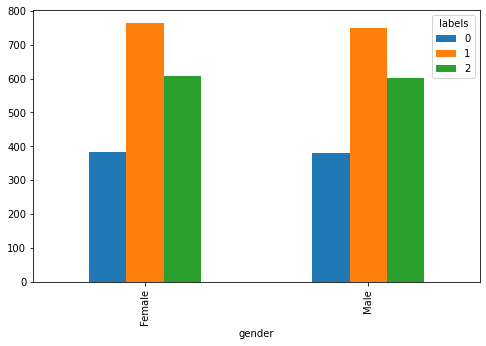

In [443]:
pd.crosstab(cust_label['gender'],cust_label['labels']).plot(kind='bar')

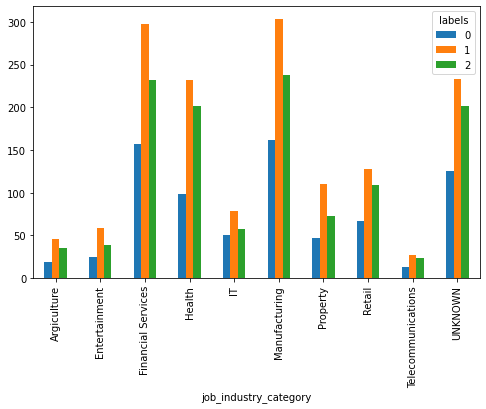

In [444]:
pd.crosstab(cust_label['job_industry_category'],cust_label['labels']).plot(kind='bar')

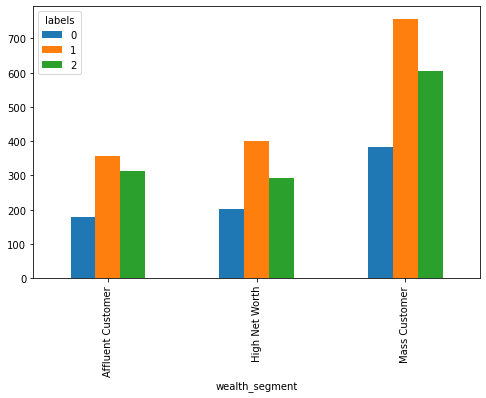

In [445]:
pd.crosstab(cust_label['wealth_segment'],cust_label['labels']).plot(kind='bar')

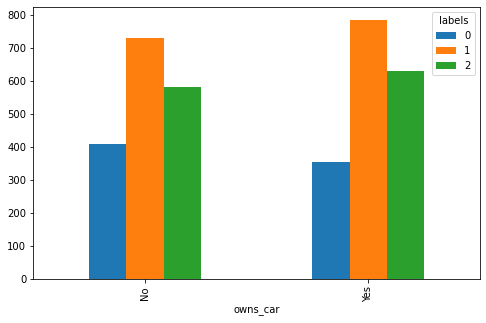

In [446]:
pd.crosstab(cust_label['owns_car'],cust_label['labels']).plot(kind='bar')

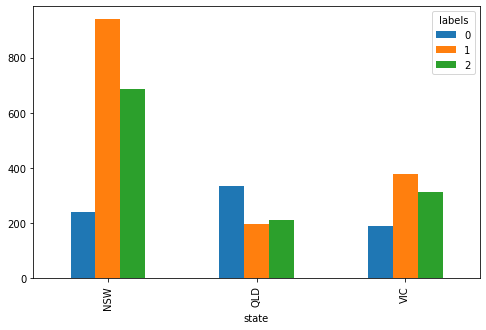

In [447]:
pd.crosstab(cust_label['state'],cust_label['labels']).plot(kind='bar')

In [448]:
# targeted center as NSW having more proportion of 1 and 2 customers , VIC

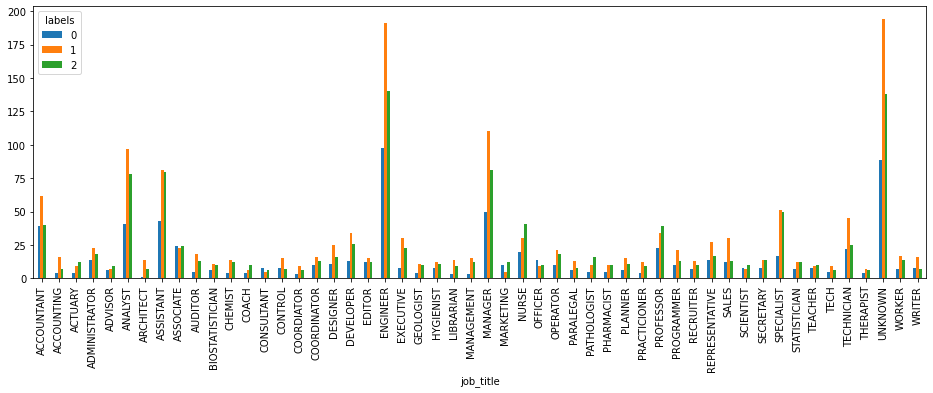

In [449]:
plt.rcParams['figure.figsize']=[16,5]
ct=pd.crosstab(cust_label['job_title'],cust_label['labels']).plot(kind='bar')

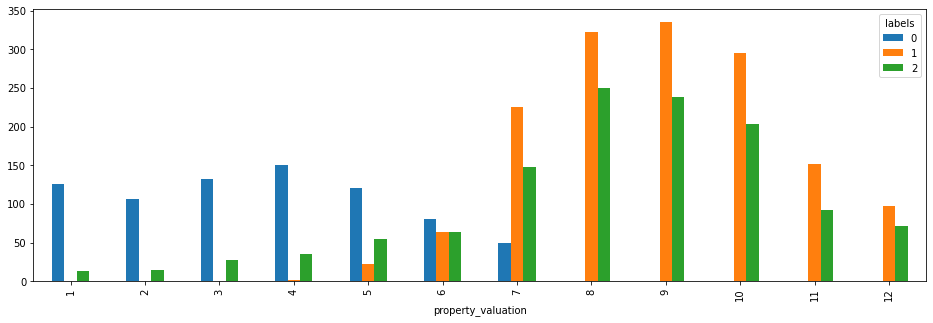

In [450]:
pd.crosstab(cust_label['property_valuation'],cust_label['labels']).plot(kind='bar')

In [451]:
#property valuation more than 7  concidering 1,2 as more valuable assets

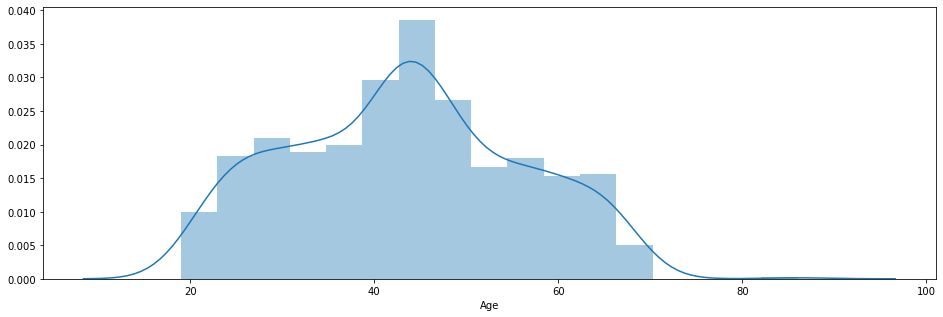

In [482]:
sns.distplot(cust_label[cust_label['labels']==0]['Age'],label=0)

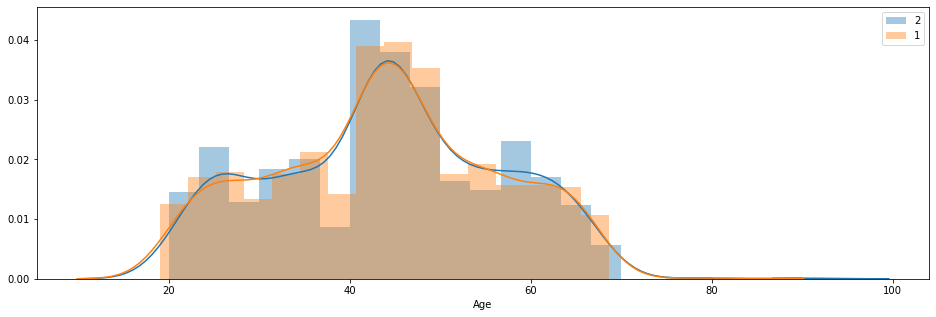

In [483]:
sns.distplot(cust_label[cust_label['labels']==2]['Age'],label=2)
sns.distplot(cust_label[cust_label['labels']==1]['Age'],label=1)

plt.legend()

In [453]:
#mostly around 40 to 50 (concidering 1 and 2 are high value)

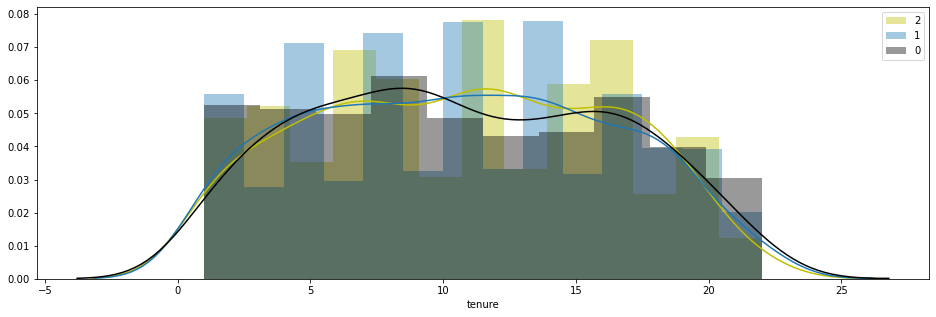

In [486]:
sns.distplot(cust_label[cust_label['labels']==2]['tenure'],label=2,color='y')
sns.distplot(cust_label[cust_label['labels']==1]['tenure'],label=1)
sns.distplot(cust_label[cust_label['labels']==0]['tenure'],label=0,color='black')
plt.legend()

In [455]:
#tenure range 10 to 17 yr(5-17 concidering 1,2 as high value)

In [487]:
cust_label

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,labels,discount_max,discount_min,total_cost,frequency,last_visit
0,1,Female,93,SECRETARY,Health,Mass Customer,N,Yes,11.0,68.0,NSW,10,2,751.02,17.87,6066.36,11,9
1,2,Male,81,OFFICER,Financial Services,Mass Customer,N,Yes,16.0,41.0,NSW,10,1,1230.30,448.68,1922.81,3,130
2,4,Male,33,UNKNOWN,IT,Mass Customer,N,No,7.0,60.0,QLD,9,1,179.44,41.13,827.15,2,197
3,5,Female,56,EDITOR,UNKNOWN,Affluent Customer,N,Yes,8.0,44.0,NSW,4,0,1230.27,75.48,3508.26,6,18
4,6,Male,35,UNKNOWN,Retail,High Net Worth,N,Yes,13.0,55.0,VIC,9,1,1660.88,57.73,1985.14,5,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,3496,Male,99,EDITOR,Manufacturing,Mass Customer,N,Yes,19.0,35.0,NSW,9,1,1612.25,114.93,2679.54,4,258
3484,3497,Female,73,ASSISTANT,Manufacturing,Affluent Customer,N,Yes,18.0,35.0,VIC,5,0,1055.82,143.82,2095.75,3,54
3485,3498,Female,28,UNKNOWN,Manufacturing,Mass Customer,N,No,5.0,26.0,VIC,4,0,1408.91,25.09,2029.73,6,129
3486,3499,Male,29,UNKNOWN,Manufacturing,Mass Customer,N,Yes,7.0,42.0,QLD,9,2,1660.88,167.21,2718.23,7,53


In [488]:
cust_label.labels.value_counts()

1    1514
2    1211
0     763
Name: labels, dtype: int64

## ----------------------------------------------------------------------------------------------------------------

In [207]:
new.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [208]:
new=new[['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value']].copy(deep=True)

In [209]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [210]:
new.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [211]:
new_data=new.copy(deep=True)

In [212]:
new['Age']=2021-pd.DatetimeIndex(new['DOB']).year
new=new.drop(['DOB','country','postcode','address'],axis=1)

In [213]:
new['Rank'].value_counts()

760     13
259     12
455      9
133      9
386      9
        ..
240      1
248      1
657      1
249      1
1000     1
Name: Rank, Length: 324, dtype: int64

In [214]:
new['last_name']=new['last_name'].fillna('')
new['full_name']=new['first_name']+new['last_name']
new=new.drop(['first_name','last_name'],axis=1)

In [215]:
new['job_title']=new['job_title'].fillna('UNKNOWN')
new['job_industry_category']=new['job_industry_category'].fillna('UNKNOWN')

In [216]:
k=new['job_title']
n=['I','II','III','IV','V',]
l=[]
for i in range(1000):
    if type(k[i]) == str:
        m=k[i].split()
        s=''
        for j in m:
            if j in n:
                continue
            else:
                s=s+' '+j
        new['job_title'].iloc[i]=str.upper(s)

C:\Users\Patra\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [217]:
new[new['Age'].isna()==True]

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Rank,Value,Age,full_name
59,U,5,ASSOCIATE PROFESSOR,IT,Mass Customer,N,No,4,VIC,5,57,1.375000,NaN,NormyGoodinge
226,U,35,LEGAL ASSISTANT,IT,Affluent Customer,N,Yes,11,NSW,9,226,1.112500,NaN,HattiCarletti
324,U,69,LEGAL ASSISTANT,IT,Mass Customer,N,Yes,3,VIC,3,324,1.010000,NaN,RozamondTurtle
358,U,65,ASSISTANT MEDIA PLANNER,Entertainment,Affluent Customer,N,No,5,QLD,8,358,0.980000,NaN,TamasSwatman
360,U,71,PROGRAMMER,IT,Mass Customer,N,Yes,11,VIC,7,361,0.977500,NaN,TracyAndrejevic
374,U,66,STRUCTURAL ANALYSIS ENGINEER,IT,Mass Customer,N,No,15,QLD,6,375,0.960000,NaN,AgnetaMcAmish
434,U,52,INTERNAL AUDITOR,IT,Mass Customer,N,No,7,VIC,5,433,0.906250,NaN,GreggAimeric
439,U,93,TAX ACCOUNTANT,IT,Mass Customer,N,Yes,14,VIC,6,436,0.903125,NaN,JohnaBunker
574,U,69,HUMAN RESOURCES MANAGER,IT,Mass Customer,N,No,12,NSW,7,575,0.796875,NaN,HarleneNono
598,U,15,PROJECT MANAGER,IT,Affluent Customer,N,No,5,NSW,11,599,0.775000,NaN,GerianneKaysor


In [218]:
cat2=pd.get_dummies(new[['gender','job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car']],drop_first=True)

num2=new[['past_3_years_bike_related_purchases','tenure']]
num2['Age']=np.log(new['Age'])
X02=pd.concat([cat2,num2],axis=1)
X02=pd.DataFrame(imp.transform(X02),columns=X02.columns)

<ipython-input-218-759dd1b47ed1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num2['Age']=np.log(new['Age'])


In [220]:
new['Age']=np.exp(X02['Age'])

In [221]:
new.job_title.unique()

array([' GENERAL MANAGER', ' STRUCTURAL ENGINEER',
       ' SENIOR COST ACCOUNTANT', ' ACCOUNT REPRESENTATIVE',
       ' FINANCIAL ANALYST', ' ASSISTANT MEDIA PLANNER',
       ' COMPENSATION ANALYST', ' HUMAN RESOURCES ASSISTANT',
       ' SPEECH PATHOLOGIST', ' ACCOUNTING ASSISTANT',
       ' PROGRAMMER ANALYST', ' ENVIRONMENTAL SPECIALIST',
       ' HUMAN RESOURCES MANAGER', ' VP MARKETING',
       ' CLINICAL SPECIALIST', ' UNKNOWN', ' ASSOCIATE PROFESSOR',
       ' ACTUARY', ' INTERNAL AUDITOR', ' PROGRAMMER',
       ' QUALITY ENGINEER', ' QUALITY CONTROL SPECIALIST',
       ' ACCOUNT EXECUTIVE', ' ENGINEER', ' NURSE', ' LIBRARIAN',
       ' PARALEGAL', ' ASSISTANT MANAGER', ' SENIOR QUALITY ENGINEER',
       ' RECRUITING MANAGER', ' DESIGN ENGINEER',
       ' BUSINESS SYSTEMS DEVELOPMENT ANALYST', ' VP QUALITY CONTROL',
       ' COST ACCOUNTANT', ' PRODUCT ENGINEER', ' SOCIAL WORKER',
       ' PAYMENT ADJUSTMENT COORDINATOR', ' MARKETING ASSISTANT',
       ' RECRUITER', ' VP PRODUC

In [223]:
k0=[]
for i in new['job_title']:
    k0.append(i.split()[-1])
pd.DataFrame(k0).value_counts()

ENGINEER           131
UNKNOWN            106
MANAGER             76
ANALYST             57
ASSISTANT           52
ACCOUNTANT          42
SPECIALIST          39
PROFESSOR           27
EXECUTIVE           22
ASSOCIATE           21
NURSE               21
PROGRAMMER          20
SALES               19
REPRESENTATIVE      19
TECHNICIAN          18
OPERATOR            18
COORDINATOR         16
DEVELOPER           15
CONSULTANT          14
TECH                14
DESIGNER            12
PLANNER             12
ADMINISTRATOR       12
MARKETING           11
PRACTICIONER        11
CONTROL             11
WORKER              11
HYGIENIST           10
EDITOR              10
LIBRARIAN           10
MANAGEMENT           9
GEOLOGIST            9
TEACHER              9
PARALEGAL            9
SECRETARY            8
PHARMACIST           8
COORDIATOR           8
COACH                8
ACTUARY              8
ADVISOR              7
CHEMIST              7
WRITER               7
STATISTICIAN         6
ARCHITECT  

In [224]:
new['job_title']=k0

In [225]:
new.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Rank,Value,Age,full_name
0,Male,86,MANAGER,Manufacturing,Mass Customer,N,Yes,14,QLD,6,1,1.718750,64.0,ChickieBrister
1,Male,69,ENGINEER,Property,Mass Customer,N,No,16,NSW,11,1,1.718750,51.0,MorlyGenery
2,Female,10,ACCOUNTANT,Financial Services,Affluent Customer,N,No,10,VIC,5,1,1.718750,47.0,ArdelisForrester
3,Female,64,REPRESENTATIVE,Manufacturing,Affluent Customer,N,Yes,5,QLD,1,4,1.703125,42.0,LucineStutt
4,Female,34,ANALYST,Financial Services,Affluent Customer,N,No,19,NSW,9,4,1.703125,56.0,MelindaHadlee


In [219]:
new.isna().sum()

gender                                  0
past_3_years_bike_related_purchases     0
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
state                                   0
property_valuation                      0
Rank                                    0
Value                                   0
Age                                    17
full_name                               0
dtype: int64